In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
train = pd.read_json('./data/processed/train.json')

In [3]:
icebergs=train[train.is_iceberg==1].sample(9)
ships=train[train.is_iceberg==0].sample(9)

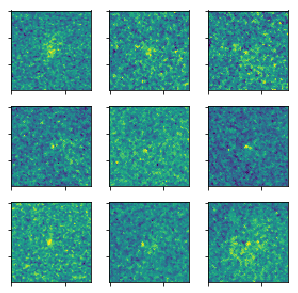

In [4]:
fig = plt.figure(figsize=(5,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    im1 = np.reshape(np.array(icebergs.iloc[i,0])-np.array(icebergs.iloc[i,1]),(75,75))
    ax.imshow(im1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.show()

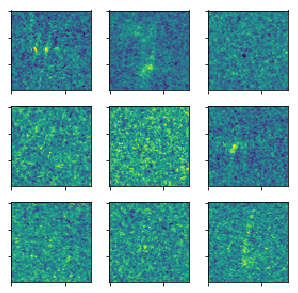

In [5]:
fig = plt.figure(figsize=(5,5))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    im1 = np.reshape(np.array(ships.iloc[i,0])-np.array(ships.iloc[i,1]),(75,75))
    ax.imshow(im1)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.show()

Observe that iceberg/ship have different band-value gap. Try to predict with just that.

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.regularizers import l1

Using TensorFlow backend.


In [13]:
train = pd.read_json('./data/processed/train.json');
b1=[np.max(np.asarray(b))-np.mean(np.asarray(b)) for b in train['band_1'].values]
b2=[np.max(np.asarray(b))-np.mean(np.asarray(b)) for b in train['band_2'].values]
X_data = np.column_stack((b1,b2))
y_data = train['is_iceberg'].values
X_train, X_dev, y_train, y_dev = train_test_split(X_data, y_data, random_state=16, test_size=0.1)

In [18]:
model=Sequential()
model.add(Dense(1,activation='sigmoid',kernel_regularizer=l1(0.),input_dim=X_train.shape[1]))
model.compile(optimizer=Adam(lr=0.00016, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-4),loss='binary_crossentropy')
model.fit(X_train,y_train,epochs=2000,verbose=2, validation_data=(X_dev,y_dev));

Train on 1443 samples, validate on 161 samples
Epoch 1/2000
 - 1s - loss: 2.1247 - val_loss: 1.8031
Epoch 2/2000
 - 0s - loss: 2.0386 - val_loss: 1.7367
Epoch 3/2000
 - 0s - loss: 1.9557 - val_loss: 1.6722
Epoch 4/2000
 - 0s - loss: 1.8765 - val_loss: 1.6126
Epoch 5/2000
 - 0s - loss: 1.8009 - val_loss: 1.5570
Epoch 6/2000
 - 0s - loss: 1.7308 - val_loss: 1.5049
Epoch 7/2000
 - 0s - loss: 1.6651 - val_loss: 1.4585
Epoch 8/2000
 - 0s - loss: 1.6036 - val_loss: 1.4139
Epoch 9/2000
 - 0s - loss: 1.5455 - val_loss: 1.3748
Epoch 10/2000
 - 0s - loss: 1.4903 - val_loss: 1.3378
Epoch 11/2000
 - 0s - loss: 1.4417 - val_loss: 1.3055
Epoch 12/2000
 - 0s - loss: 1.3951 - val_loss: 1.2762
Epoch 13/2000
 - 0s - loss: 1.3526 - val_loss: 1.2516
Epoch 14/2000
 - 0s - loss: 1.3149 - val_loss: 1.2290
Epoch 15/2000
 - 0s - loss: 1.2797 - val_loss: 1.2101
Epoch 16/2000
 - 0s - loss: 1.2475 - val_loss: 1.1937
Epoch 17/2000
 - 0s - loss: 1.2206 - val_loss: 1.1817
Epoch 18/2000
 - 0s - loss: 1.1961 - val_los

Epoch 152/2000
 - 0s - loss: 0.8718 - val_loss: 0.9772
Epoch 153/2000
 - 0s - loss: 0.8706 - val_loss: 0.9749
Epoch 154/2000
 - 0s - loss: 0.8694 - val_loss: 0.9736
Epoch 155/2000
 - 0s - loss: 0.8681 - val_loss: 0.9722
Epoch 156/2000
 - 0s - loss: 0.8669 - val_loss: 0.9721
Epoch 157/2000
 - 0s - loss: 0.8656 - val_loss: 0.9693
Epoch 158/2000
 - 0s - loss: 0.8643 - val_loss: 0.9658
Epoch 159/2000
 - 0s - loss: 0.8632 - val_loss: 0.9646
Epoch 160/2000
 - 0s - loss: 0.8619 - val_loss: 0.9634
Epoch 161/2000
 - 0s - loss: 0.8607 - val_loss: 0.9625
Epoch 162/2000
 - 0s - loss: 0.8596 - val_loss: 0.9608
Epoch 163/2000
 - 0s - loss: 0.8584 - val_loss: 0.9602
Epoch 164/2000
 - 0s - loss: 0.8573 - val_loss: 0.9595
Epoch 165/2000
 - 0s - loss: 0.8561 - val_loss: 0.9563
Epoch 166/2000
 - 0s - loss: 0.8549 - val_loss: 0.9550
Epoch 167/2000
 - 0s - loss: 0.8536 - val_loss: 0.9541
Epoch 168/2000
 - 0s - loss: 0.8525 - val_loss: 0.9528
Epoch 169/2000
 - 0s - loss: 0.8513 - val_loss: 0.9507
Epoch 170/

Epoch 301/2000
 - 0s - loss: 0.7373 - val_loss: 0.8117
Epoch 302/2000
 - 0s - loss: 0.7367 - val_loss: 0.8100
Epoch 303/2000
 - 0s - loss: 0.7360 - val_loss: 0.8090
Epoch 304/2000
 - 0s - loss: 0.7354 - val_loss: 0.8084
Epoch 305/2000
 - 0s - loss: 0.7348 - val_loss: 0.8077
Epoch 306/2000
 - 0s - loss: 0.7342 - val_loss: 0.8066
Epoch 307/2000
 - 0s - loss: 0.7336 - val_loss: 0.8059
Epoch 308/2000
 - 0s - loss: 0.7330 - val_loss: 0.8058
Epoch 309/2000
 - 0s - loss: 0.7324 - val_loss: 0.8048
Epoch 310/2000
 - 0s - loss: 0.7318 - val_loss: 0.8049
Epoch 311/2000
 - 0s - loss: 0.7312 - val_loss: 0.8034
Epoch 312/2000
 - 0s - loss: 0.7306 - val_loss: 0.8026
Epoch 313/2000
 - 0s - loss: 0.7301 - val_loss: 0.8021
Epoch 314/2000
 - 0s - loss: 0.7294 - val_loss: 0.8012
Epoch 315/2000
 - 0s - loss: 0.7288 - val_loss: 0.8005
Epoch 316/2000
 - 0s - loss: 0.7282 - val_loss: 0.7998
Epoch 317/2000
 - 0s - loss: 0.7276 - val_loss: 0.7988
Epoch 318/2000
 - 0s - loss: 0.7271 - val_loss: 0.7993
Epoch 319/

Epoch 450/2000
 - 0s - loss: 0.6705 - val_loss: 0.7237
Epoch 451/2000
 - 0s - loss: 0.6703 - val_loss: 0.7234
Epoch 452/2000
 - 0s - loss: 0.6699 - val_loss: 0.7228
Epoch 453/2000
 - 0s - loss: 0.6696 - val_loss: 0.7230
Epoch 454/2000
 - 0s - loss: 0.6693 - val_loss: 0.7225
Epoch 455/2000
 - 0s - loss: 0.6690 - val_loss: 0.7224
Epoch 456/2000
 - 0s - loss: 0.6687 - val_loss: 0.7229
Epoch 457/2000
 - 0s - loss: 0.6685 - val_loss: 0.7222
Epoch 458/2000
 - 0s - loss: 0.6682 - val_loss: 0.7222
Epoch 459/2000
 - 0s - loss: 0.6679 - val_loss: 0.7214
Epoch 460/2000
 - 0s - loss: 0.6676 - val_loss: 0.7212
Epoch 461/2000
 - 0s - loss: 0.6673 - val_loss: 0.7202
Epoch 462/2000
 - 0s - loss: 0.6670 - val_loss: 0.7205
Epoch 463/2000
 - 0s - loss: 0.6667 - val_loss: 0.7202
Epoch 464/2000
 - 0s - loss: 0.6664 - val_loss: 0.7190
Epoch 465/2000
 - 0s - loss: 0.6661 - val_loss: 0.7186
Epoch 466/2000
 - 0s - loss: 0.6658 - val_loss: 0.7182
Epoch 467/2000
 - 0s - loss: 0.6656 - val_loss: 0.7182
Epoch 468/

Epoch 599/2000
 - 0s - loss: 0.6384 - val_loss: 0.6793
Epoch 600/2000
 - 0s - loss: 0.6382 - val_loss: 0.6792
Epoch 601/2000
 - 0s - loss: 0.6380 - val_loss: 0.6791
Epoch 602/2000
 - 0s - loss: 0.6379 - val_loss: 0.6788
Epoch 603/2000
 - 0s - loss: 0.6377 - val_loss: 0.6783
Epoch 604/2000
 - 0s - loss: 0.6376 - val_loss: 0.6781
Epoch 605/2000
 - 0s - loss: 0.6375 - val_loss: 0.6777
Epoch 606/2000
 - 0s - loss: 0.6373 - val_loss: 0.6775
Epoch 607/2000
 - 0s - loss: 0.6372 - val_loss: 0.6775
Epoch 608/2000
 - 0s - loss: 0.6370 - val_loss: 0.6777
Epoch 609/2000
 - 0s - loss: 0.6369 - val_loss: 0.6777
Epoch 610/2000
 - 0s - loss: 0.6367 - val_loss: 0.6774
Epoch 611/2000
 - 0s - loss: 0.6366 - val_loss: 0.6773
Epoch 612/2000
 - 0s - loss: 0.6365 - val_loss: 0.6767
Epoch 613/2000
 - 0s - loss: 0.6363 - val_loss: 0.6766
Epoch 614/2000
 - 0s - loss: 0.6362 - val_loss: 0.6763
Epoch 615/2000
 - 0s - loss: 0.6361 - val_loss: 0.6758
Epoch 616/2000
 - 0s - loss: 0.6359 - val_loss: 0.6756
Epoch 617/

Epoch 748/2000
 - 0s - loss: 0.6228 - val_loss: 0.6555
Epoch 749/2000
 - 0s - loss: 0.6227 - val_loss: 0.6551
Epoch 750/2000
 - 0s - loss: 0.6226 - val_loss: 0.6547
Epoch 751/2000
 - 0s - loss: 0.6226 - val_loss: 0.6542
Epoch 752/2000
 - 0s - loss: 0.6225 - val_loss: 0.6542
Epoch 753/2000
 - 0s - loss: 0.6224 - val_loss: 0.6539
Epoch 754/2000
 - 0s - loss: 0.6223 - val_loss: 0.6540
Epoch 755/2000
 - 0s - loss: 0.6222 - val_loss: 0.6541
Epoch 756/2000
 - 0s - loss: 0.6222 - val_loss: 0.6539
Epoch 757/2000
 - 0s - loss: 0.6221 - val_loss: 0.6538
Epoch 758/2000
 - 0s - loss: 0.6221 - val_loss: 0.6539
Epoch 759/2000
 - 0s - loss: 0.6220 - val_loss: 0.6535
Epoch 760/2000
 - 0s - loss: 0.6219 - val_loss: 0.6540
Epoch 761/2000
 - 0s - loss: 0.6218 - val_loss: 0.6537
Epoch 762/2000
 - 0s - loss: 0.6218 - val_loss: 0.6540
Epoch 763/2000
 - 0s - loss: 0.6217 - val_loss: 0.6537
Epoch 764/2000
 - 0s - loss: 0.6217 - val_loss: 0.6534
Epoch 765/2000
 - 0s - loss: 0.6216 - val_loss: 0.6534
Epoch 766/

Epoch 897/2000
 - 0s - loss: 0.6149 - val_loss: 0.6424
Epoch 898/2000
 - 0s - loss: 0.6148 - val_loss: 0.6425
Epoch 899/2000
 - 0s - loss: 0.6148 - val_loss: 0.6421
Epoch 900/2000
 - 0s - loss: 0.6148 - val_loss: 0.6419
Epoch 901/2000
 - 0s - loss: 0.6147 - val_loss: 0.6420
Epoch 902/2000
 - 0s - loss: 0.6147 - val_loss: 0.6420
Epoch 903/2000
 - 0s - loss: 0.6147 - val_loss: 0.6419
Epoch 904/2000
 - 0s - loss: 0.6147 - val_loss: 0.6416
Epoch 905/2000
 - 0s - loss: 0.6146 - val_loss: 0.6418
Epoch 906/2000
 - 0s - loss: 0.6146 - val_loss: 0.6418
Epoch 907/2000
 - 0s - loss: 0.6145 - val_loss: 0.6418
Epoch 908/2000
 - 0s - loss: 0.6145 - val_loss: 0.6418
Epoch 909/2000
 - 0s - loss: 0.6145 - val_loss: 0.6417
Epoch 910/2000
 - 0s - loss: 0.6144 - val_loss: 0.6417
Epoch 911/2000
 - 0s - loss: 0.6144 - val_loss: 0.6414
Epoch 912/2000
 - 0s - loss: 0.6144 - val_loss: 0.6414
Epoch 913/2000
 - 0s - loss: 0.6143 - val_loss: 0.6410
Epoch 914/2000
 - 0s - loss: 0.6143 - val_loss: 0.6411
Epoch 915/

 - 0s - loss: 0.6107 - val_loss: 0.6344
Epoch 1046/2000
 - 0s - loss: 0.6107 - val_loss: 0.6340
Epoch 1047/2000
 - 0s - loss: 0.6106 - val_loss: 0.6339
Epoch 1048/2000
 - 0s - loss: 0.6105 - val_loss: 0.6339
Epoch 1049/2000
 - 0s - loss: 0.6105 - val_loss: 0.6338
Epoch 1050/2000
 - 0s - loss: 0.6105 - val_loss: 0.6339
Epoch 1051/2000
 - 0s - loss: 0.6105 - val_loss: 0.6342
Epoch 1052/2000
 - 0s - loss: 0.6104 - val_loss: 0.6342
Epoch 1053/2000
 - 0s - loss: 0.6104 - val_loss: 0.6341
Epoch 1054/2000
 - 0s - loss: 0.6104 - val_loss: 0.6337
Epoch 1055/2000
 - 0s - loss: 0.6104 - val_loss: 0.6337
Epoch 1056/2000
 - 0s - loss: 0.6103 - val_loss: 0.6336
Epoch 1057/2000
 - 0s - loss: 0.6103 - val_loss: 0.6336
Epoch 1058/2000
 - 0s - loss: 0.6103 - val_loss: 0.6338
Epoch 1059/2000
 - 0s - loss: 0.6103 - val_loss: 0.6338
Epoch 1060/2000
 - 0s - loss: 0.6103 - val_loss: 0.6335
Epoch 1061/2000
 - 0s - loss: 0.6103 - val_loss: 0.6334
Epoch 1062/2000
 - 0s - loss: 0.6102 - val_loss: 0.6334
Epoch 10

Epoch 1192/2000
 - 0s - loss: 0.6079 - val_loss: 0.6287
Epoch 1193/2000
 - 0s - loss: 0.6079 - val_loss: 0.6285
Epoch 1194/2000
 - 0s - loss: 0.6078 - val_loss: 0.6285
Epoch 1195/2000
 - 0s - loss: 0.6078 - val_loss: 0.6281
Epoch 1196/2000
 - 0s - loss: 0.6078 - val_loss: 0.6282
Epoch 1197/2000
 - 0s - loss: 0.6078 - val_loss: 0.6281
Epoch 1198/2000
 - 0s - loss: 0.6078 - val_loss: 0.6280
Epoch 1199/2000
 - 0s - loss: 0.6078 - val_loss: 0.6281
Epoch 1200/2000
 - 0s - loss: 0.6078 - val_loss: 0.6284
Epoch 1201/2000
 - 0s - loss: 0.6078 - val_loss: 0.6280
Epoch 1202/2000
 - 0s - loss: 0.6077 - val_loss: 0.6281
Epoch 1203/2000
 - 0s - loss: 0.6077 - val_loss: 0.6282
Epoch 1204/2000
 - 0s - loss: 0.6077 - val_loss: 0.6285
Epoch 1205/2000
 - 0s - loss: 0.6077 - val_loss: 0.6284
Epoch 1206/2000
 - 0s - loss: 0.6077 - val_loss: 0.6282
Epoch 1207/2000
 - 0s - loss: 0.6077 - val_loss: 0.6281
Epoch 1208/2000
 - 0s - loss: 0.6076 - val_loss: 0.6280
Epoch 1209/2000
 - 0s - loss: 0.6077 - val_loss:

Epoch 1339/2000
 - 0s - loss: 0.6060 - val_loss: 0.6252
Epoch 1340/2000
 - 0s - loss: 0.6060 - val_loss: 0.6252
Epoch 1341/2000
 - 0s - loss: 0.6060 - val_loss: 0.6254
Epoch 1342/2000
 - 0s - loss: 0.6060 - val_loss: 0.6252
Epoch 1343/2000
 - 0s - loss: 0.6060 - val_loss: 0.6249
Epoch 1344/2000
 - 0s - loss: 0.6060 - val_loss: 0.6248
Epoch 1345/2000
 - 0s - loss: 0.6060 - val_loss: 0.6247
Epoch 1346/2000
 - 0s - loss: 0.6059 - val_loss: 0.6249
Epoch 1347/2000
 - 0s - loss: 0.6060 - val_loss: 0.6250
Epoch 1348/2000
 - 0s - loss: 0.6059 - val_loss: 0.6251
Epoch 1349/2000
 - 0s - loss: 0.6059 - val_loss: 0.6251
Epoch 1350/2000
 - 0s - loss: 0.6059 - val_loss: 0.6251
Epoch 1351/2000
 - 0s - loss: 0.6059 - val_loss: 0.6251
Epoch 1352/2000
 - 0s - loss: 0.6059 - val_loss: 0.6250
Epoch 1353/2000
 - 0s - loss: 0.6059 - val_loss: 0.6247
Epoch 1354/2000
 - 0s - loss: 0.6059 - val_loss: 0.6247
Epoch 1355/2000
 - 0s - loss: 0.6058 - val_loss: 0.6246
Epoch 1356/2000
 - 0s - loss: 0.6059 - val_loss:

Epoch 1486/2000
 - 0s - loss: 0.6046 - val_loss: 0.6216
Epoch 1487/2000
 - 0s - loss: 0.6046 - val_loss: 0.6217
Epoch 1488/2000
 - 0s - loss: 0.6046 - val_loss: 0.6215
Epoch 1489/2000
 - 0s - loss: 0.6046 - val_loss: 0.6214
Epoch 1490/2000
 - 0s - loss: 0.6046 - val_loss: 0.6213
Epoch 1491/2000
 - 0s - loss: 0.6046 - val_loss: 0.6213
Epoch 1492/2000
 - 0s - loss: 0.6046 - val_loss: 0.6215
Epoch 1493/2000
 - 0s - loss: 0.6046 - val_loss: 0.6215
Epoch 1494/2000
 - 0s - loss: 0.6046 - val_loss: 0.6216
Epoch 1495/2000
 - 0s - loss: 0.6046 - val_loss: 0.6215
Epoch 1496/2000
 - 0s - loss: 0.6045 - val_loss: 0.6216
Epoch 1497/2000
 - 0s - loss: 0.6045 - val_loss: 0.6216
Epoch 1498/2000
 - 0s - loss: 0.6045 - val_loss: 0.6215
Epoch 1499/2000
 - 0s - loss: 0.6045 - val_loss: 0.6214
Epoch 1500/2000
 - 0s - loss: 0.6045 - val_loss: 0.6212
Epoch 1501/2000
 - 0s - loss: 0.6045 - val_loss: 0.6215
Epoch 1502/2000
 - 0s - loss: 0.6045 - val_loss: 0.6215
Epoch 1503/2000
 - 0s - loss: 0.6045 - val_loss:

Epoch 1633/2000
 - 0s - loss: 0.6036 - val_loss: 0.6195
Epoch 1634/2000
 - 0s - loss: 0.6035 - val_loss: 0.6196
Epoch 1635/2000
 - 0s - loss: 0.6035 - val_loss: 0.6195
Epoch 1636/2000
 - 0s - loss: 0.6035 - val_loss: 0.6195
Epoch 1637/2000
 - 0s - loss: 0.6035 - val_loss: 0.6196
Epoch 1638/2000
 - 0s - loss: 0.6035 - val_loss: 0.6196
Epoch 1639/2000
 - 0s - loss: 0.6035 - val_loss: 0.6195
Epoch 1640/2000
 - 0s - loss: 0.6035 - val_loss: 0.6196
Epoch 1641/2000
 - 0s - loss: 0.6035 - val_loss: 0.6195
Epoch 1642/2000
 - 0s - loss: 0.6035 - val_loss: 0.6195
Epoch 1643/2000
 - 0s - loss: 0.6035 - val_loss: 0.6197
Epoch 1644/2000
 - 0s - loss: 0.6035 - val_loss: 0.6195
Epoch 1645/2000
 - 0s - loss: 0.6035 - val_loss: 0.6194
Epoch 1646/2000
 - 0s - loss: 0.6034 - val_loss: 0.6195
Epoch 1647/2000
 - 0s - loss: 0.6034 - val_loss: 0.6196
Epoch 1648/2000
 - 0s - loss: 0.6034 - val_loss: 0.6195
Epoch 1649/2000
 - 0s - loss: 0.6034 - val_loss: 0.6195
Epoch 1650/2000
 - 0s - loss: 0.6034 - val_loss:

Epoch 1780/2000
 - 0s - loss: 0.6026 - val_loss: 0.6175
Epoch 1781/2000
 - 0s - loss: 0.6026 - val_loss: 0.6173
Epoch 1782/2000
 - 0s - loss: 0.6026 - val_loss: 0.6174
Epoch 1783/2000
 - 0s - loss: 0.6026 - val_loss: 0.6174
Epoch 1784/2000
 - 0s - loss: 0.6026 - val_loss: 0.6174
Epoch 1785/2000
 - 0s - loss: 0.6026 - val_loss: 0.6175
Epoch 1786/2000
 - 0s - loss: 0.6026 - val_loss: 0.6174
Epoch 1787/2000
 - 0s - loss: 0.6026 - val_loss: 0.6175
Epoch 1788/2000
 - 0s - loss: 0.6026 - val_loss: 0.6173
Epoch 1789/2000
 - 0s - loss: 0.6026 - val_loss: 0.6173
Epoch 1790/2000
 - 0s - loss: 0.6026 - val_loss: 0.6173
Epoch 1791/2000
 - 0s - loss: 0.6026 - val_loss: 0.6175
Epoch 1792/2000
 - 0s - loss: 0.6026 - val_loss: 0.6175
Epoch 1793/2000
 - 0s - loss: 0.6026 - val_loss: 0.6174
Epoch 1794/2000
 - 0s - loss: 0.6026 - val_loss: 0.6172
Epoch 1795/2000
 - 0s - loss: 0.6026 - val_loss: 0.6170
Epoch 1796/2000
 - 0s - loss: 0.6026 - val_loss: 0.6171
Epoch 1797/2000
 - 0s - loss: 0.6025 - val_loss:

Epoch 1927/2000
 - 0s - loss: 0.6019 - val_loss: 0.6161
Epoch 1928/2000
 - 0s - loss: 0.6019 - val_loss: 0.6161
Epoch 1929/2000
 - 0s - loss: 0.6019 - val_loss: 0.6163
Epoch 1930/2000
 - 0s - loss: 0.6019 - val_loss: 0.6165
Epoch 1931/2000
 - 0s - loss: 0.6019 - val_loss: 0.6163
Epoch 1932/2000
 - 0s - loss: 0.6019 - val_loss: 0.6163
Epoch 1933/2000
 - 0s - loss: 0.6019 - val_loss: 0.6161
Epoch 1934/2000
 - 0s - loss: 0.6019 - val_loss: 0.6162
Epoch 1935/2000
 - 0s - loss: 0.6018 - val_loss: 0.6161
Epoch 1936/2000
 - 0s - loss: 0.6018 - val_loss: 0.6160
Epoch 1937/2000
 - 0s - loss: 0.6018 - val_loss: 0.6160
Epoch 1938/2000
 - 0s - loss: 0.6018 - val_loss: 0.6160
Epoch 1939/2000
 - 0s - loss: 0.6018 - val_loss: 0.6159
Epoch 1940/2000
 - 0s - loss: 0.6018 - val_loss: 0.6159
Epoch 1941/2000
 - 0s - loss: 0.6018 - val_loss: 0.6159
Epoch 1942/2000
 - 0s - loss: 0.6018 - val_loss: 0.6159
Epoch 1943/2000
 - 0s - loss: 0.6018 - val_loss: 0.6158
Epoch 1944/2000
 - 0s - loss: 0.6018 - val_loss: